<a href="https://colab.research.google.com/github/mohsenahmadi2003/MLP/blob/main/artificial_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

section 1 : simple neuron

input, weight, bias





In [ ]:
x = torch.tensor([[1., 2., 0, 4.0, 1.0],
                  [0, 1., 1., 1., 1.],
                  [2., 3., 0, 1., 4.]])

w = torch.tensor([1., 0.5, 1., -1., -0.5])
b = torch.tensor(1.)

linear activate function

In [ ]:
def linear_activate(x):
    return x

step function

In [ ]:
def step(x):
    if x > 0:
        y = torch.tensor(1.)
    elif x < 0:
        y = torch.tensor(0.)
    else:
        y = torch.tensor(0.5)
    return y

In [ ]:
torch.heaviside(torch.tensor(5.), torch.tensor(0.5))

tensor(1.)

Neuron function

In [ ]:
def neuron(x, w, b, af):
    z = 0
    for x_i, w_i in zip(x, w):
        z += x_i * w_i
    z += b
    y = af(z)
    return y

Test

In [ ]:
neuron(x[0], w, b, linear_activate)

tensor(-1.5000)

In [ ]:
neuron(x[0], w, b, step)

tensor(0.)

section 2 : vectorization

In [ ]:
def neuron(x, w, b, af):
    y = af(x@w + b)
    return y

section 3 : class neuron

In [ ]:
class Neuron():
    def __init__(self, m:int, af:str) -> None:
        self.w = torch.randn(m)
        self.b = torch.randn(1)
        self.af:str = af

    def __call__(self, x):
        if self.af == 'linear':
            y = self.linear((self.w @ x) + self.b)
        elif self.af == 'step':
            y = self.step((self.w @ x) + self.b)
        return y

    def linear(self, x):
        return x

    def step(self, x):
        ...



In [ ]:
neuron2 = Neuron(5, linear_activate)

In [ ]:
# neuron2(x[0])

Loss Function

In [ ]:
yp = torch.tensor([-0.39, -0.47,  0.61, -0.75,  0.31, -0.54,  0.61, -2.83, 1.24,  0.10])

yt = torch.tensor([-0.39,  1.00,  0.51, -0.85,  0.31, -0.04,  1.01, -0.55, 1.24,  0.10])

from scratch

In [ ]:
torch.mean((yp -yt)**2)

tensor(0.7789)

In [ ]:
from torch import nn
import torch.nn.functional as F

In [ ]:
mse = nn.MSELoss()
mse(yp, yt)

tensor(0.7789)

MSE functional in pytorch

In [ ]:
# F.mse_loss()

mean absolute error

In [ ]:
torch.mean(torch.abs(yp -yt))

tensor(0.4850)

In [ ]:
mae = nn.L1Loss() # -> for mean absolute error
mae(yp, yt)

tensor(0.4850)

In [ ]:
F.l1_loss(yp, yt)

tensor(0.4850)

In [ ]:
x = torch.tensor([[1., 2., 0, 4.0, 1.0],
                  [0, 1., 1., 1., 1.],
                  [2., 3., 0, 1., 4.]])

yt = torch.tensor([1., 2., 0.])

In [ ]:
neuron = Neuron(5, 'linear')

In [ ]:
yp = neuron(x[0])
error = F.mse_loss(yp, yt[[0]]) # باید هم سایز باشند
print(error)

tensor(58.9448)


In [ ]:
yp = neuron(x[0])
print(yp)
print(yt[[0]])
error = F.l1_loss(yp, yt[[0]])
print(error)

tensor([8.6776])
tensor([1.])
tensor(7.6776)


Gradient descent

In [ ]:
def funcx2(x):
    return x**2

In [ ]:
x = torch.linspace(-5, 5, 100)


implement gradient function

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

def plot(x, func):
  plt.figure(figsize=(8, 6))
  plt.plot(x, func(x), linewidth=3)
  plt.xlabel('x', fontsize=15)
  plt.ylabel('f(x)', fontsize=15)
  plt.show()

def animate(x, func, gradfunc, xi, eta, N):
  if gradfunc is None:
    gradfunc = func
  xi_hist = []
  xi_hist.append(xi.clone())
  for iter in range(N):
    xi = gradient_descent(gradfunc, xi, eta, 1)
    xi_hist.append(xi.clone())
  xi_hist = torch.tensor(xi_hist)
  fxi_hist = func(xi_hist)
  # plot animation
  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(1, 1, 1)
  def plot_animate(i):
    ax.clear()
    ax.plot(x, func(x), linewidth=3)
    ax.plot(xi_hist[0:i], fxi_hist[0:i], color='black', linewidth=4)
    ax.plot(xi_hist[0], fxi_hist[0], 'r*', markersize=15)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
  ani = animation.FuncAnimation(fig, plot_animate,
                                frames=len(xi_hist),
                                interval=120,
                                repeat=False)
  plt.close()
  return HTML(ani.to_html5_video())

In [ ]:
def gradfx2(x):
    return 2*x

In [ ]:
def gradient_descent(gradfnc, xi, eta, N):
    for iter in range(N):
        dy = gradfnc(xi)
        xi = (xi - (eta * dy))

    return xi

In [ ]:
N = 2
eta = 0.5
xi = torch.tensor(-4.)
gradient_descent(gradfx2, xi, eta, N)

animate(x, funcx2, gradfx2, xi, eta, N)

In [ ]:
def funcx4(x):
  return 0.125*x**4 - 0.1875*x**3 - 0.75*x**2 + 0.5*x

In [ ]:
def gradfx4(x):
  return 0.5*x**3 - 0.5625*x**2 - 1.5*x + 0.5

In [ ]:
x = torch.linspace(-2.5, 3.3, 100)
xi = torch.tensor(1.)
eta = 0.3
N = 30

animate(x, funcx4, gradfx4, xi, eta, N)

In [ ]:
def funclog(x):
  return torch.log(1 + torch.abs(x))**(2 + torch.sin(x))

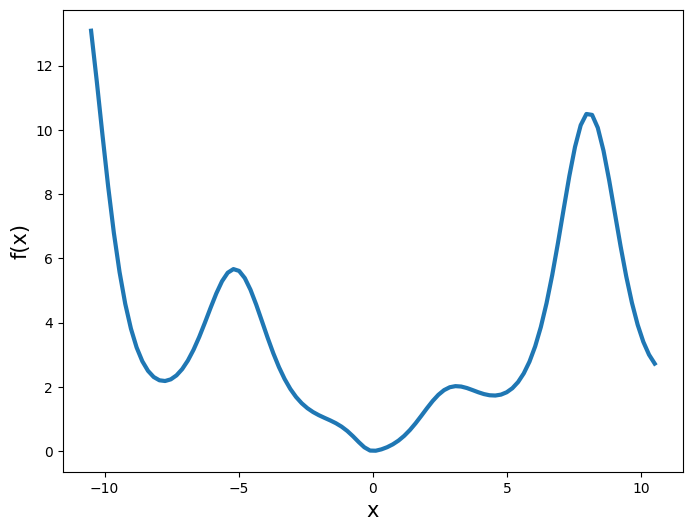

In [ ]:
x = torch.linspace(-10.5, 10.5, 100)
plot(x, funclog)

Section 4: Autograd

In [ ]:
r = torch.tensor(3., requires_grad=True) # must be float and requires graf = True
y = r**2
y.backward()
r.grad

tensor(6.)

In [ ]:
def gradient_descent(func, xi, eta, N):
    for _ in range(N):
        func(xi).backward()
        xi.data -= eta * xi.grad
        xi.grad.zero_()

    return xi

In [ ]:
xi = torch.tensor(3., requires_grad=True)
eta = 0.1
N = 50
gradient_descent(funcx2, xi, eta, N)

tensor(4.2817e-05, requires_grad=True)

exercise

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def plot3d(x, y, func):
  x, y = torch.meshgrid(x, y)
  z = func(x, y)
  fig = plt.figure(figsize=(15, 10))
  ax = plt.axes(projection='3d')
  ax.plot_surface(x.numpy(), y.numpy(), z.numpy(), cmap='viridis')
  plt.show()

In [ ]:
def animate3d(x, y, func, gradfunc, xi, yi, eta, N):
  x, y = torch.meshgrid(x, y)
  if gradfunc is None:
    gradfunc = func
  xi_hist = []
  yi_hist = []
  xi_hist.append(xi.clone())
  yi_hist.append(yi.clone())
  for iter in range(N):
    xi, yi = gradient_descent3d(gradfunc, xi, yi, eta, 1)
    xi_hist.append(xi.clone())
    yi_hist.append(yi.clone())
  xi_hist = torch.tensor(xi_hist, requires_grad=False)
  yi_hist = torch.tensor(yi_hist, requires_grad=False)
  fi_hist = func(xi_hist, yi_hist)
  # plot animation
  fig = plt.figure(figsize=(15, 10))
  ax = plt.axes(projection='3d')
  def plot_animate(i):
    ax.clear()
    ax.plot_surface(x.numpy(), y.numpy(), func(x, y).numpy(), cmap='viridis')
    ax.plot(xi_hist[0:i].tolist(), yi_hist[0:i].tolist(), fi_hist[0:i].tolist(),
            color='black', linewidth=4)
    ax.plot([xi_hist[0]], [yi_hist[0]], [fi_hist[0]],
            'r*', markersize=15)
  ani = animation.FuncAnimation(fig, plot_animate,
                                frames=len(xi_hist),
                                interval=60,
                                repeat=False)
  plt.close()
  return HTML(ani.to_html5_video())

In [ ]:
!pip install matplotlib


In [ ]:
def func3d(x, y):
  return ((x**2) - (y**2))

def gradient_descent3d(func3d, xi, yi, eta, N):
    for _ in range(N):
        func3d(xi, yi).backward()
        xi.data -= eta * xi.grad
        yi.data -= eta * yi.grad
        xi.grad.zero_()
        yi.grad.zero_()
    return xi, yi



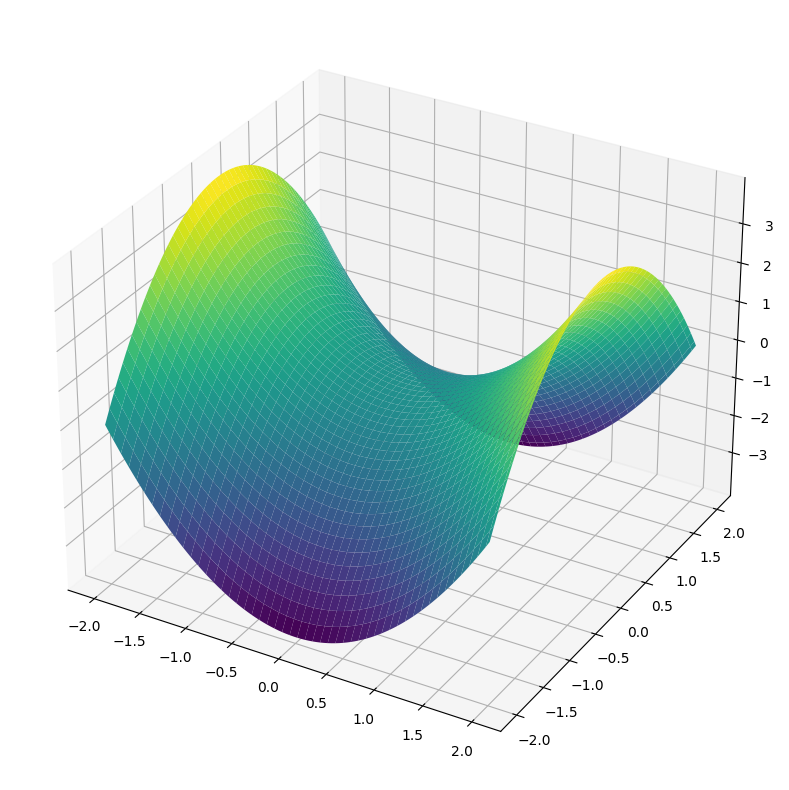

In [ ]:
x = torch.linspace(-2, 2, 100)
y = torch.linspace(-2, 2, 100)
plot3d(x, y, func3d)


In [ ]:
xi = torch.tensor(-2., requires_grad=True)
yi = torch.tensor(2., requires_grad=True)
eta = 0.1
N = 100

animate3d(x, y, func3d, None, xi, yi, eta, N)

In [ ]:
import torch
from torch import optim

In [ ]:
def funcx2(x):
    return x**2

In [ ]:
xi = torch.tensor(-3., requires_grad=True)

In [ ]:
parameters = [xi]
eta = 0.1
N = 50

In [ ]:
optimizer = optim.SGD(parameters, eta)

In [ ]:
for _ in range(N):
    funcx2(xi).backward()
    optimizer.step()
    optimizer.zero_grad()


In [ ]:
xi

tensor(-4.2817e-05, requires_grad=True)